In [1]:
                                                                  #EXplainable Boosting Machine# 

What are EBMs?
EBM is a type of generalized additive model or GAM for short. Linear models assume a linear relationship between the response and predictors. Thus, they are unable to capture the non-linearities in the data.

Linear Model: y = β0 + β1x1 + β2x2 + … + βn xn

To overcome this shortcoming, in the late 80’s statisticians Hastie & Tibshirani developed generalized additive models(GAMs), which keep the additive structure, and therefore the interpretability of the linear models. Thus, the linear relationship between the response and predictor variable gets replaced by several non-linear smooth functions(f1, f2, etc.) to model and capture the non-linearities in the data. GAMs are more accurate than simple linear models, and since they do not contain any interactions between features, users can also easily interpret them.

Additive Model: y = f1(x1) + f2(x2) + … + fn(xn)

EBMs are an improvement on the GAMs utilizing techniques like gradient boosting and bagging. EBMs include pairwise interaction terms, which increases their accuracy even further.

EBMs: y = Ʃi fi (xi) + Ʃij fij(xi , xj) + Ʃijk fijk (xi , xj , xk )

IntepretML: A Unified Framework for Machine Learning Interpretability

EBMs come packaged within a Machine Learning Interpretability toolkit called InterpretML. It is an open-source package for training interpretable models as well as explaining black-box systems. Within InterpretML, the explainability algorithms are organized into two major sections, i.e., Glassbox models and Blackbox explanations. This means that this tool can not only explain the decisions of inherently interpretable models but also provide possible reasoning for black-box models. The following code architecture from the official paper sums it nicely.

                                                                         #Links#
paper : https://arxiv.org/pdf/1909.09223.pdf
InterpretML : https://interpret.ml/docs/index.html#

In [2]:
!pip install interpret -q

In [3]:
# Importing the necessary Libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#interpretml
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor,LinearRegression,RegressionTree
seed=1
#load the data 
train_data = pd.read_csv(r"C:\Users\ADAPA SUNIL KUMAR\Downloads\train.csv\train.csv")

In [4]:
train_data.head()


,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [5]:
train_data.columns

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [6]:
columns = ['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness']

In [7]:
#split the data 
X = train_data.drop(['Hardness'],axis=1)
y = train_data['Hardness']

In [8]:
X.shape , y.shape

((10407, 12), (10407,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [10]:
#exploring the data 
exploring_data =Marginal().explain_data(X_train,y_train,name='Train Data')
show(exploring_data)

<!-- http://127.0.0.1:7001/2626201747024/ -->

In [11]:
#Training the Explainable Boosting Machine 
ebm = ExplainableBoostingRegressor(random_state=seed,n_jobs=-1)
ebm.fit(X_train,y_train)

ExplainableBoostingRegressor(n_jobs=-1, random_state=1)

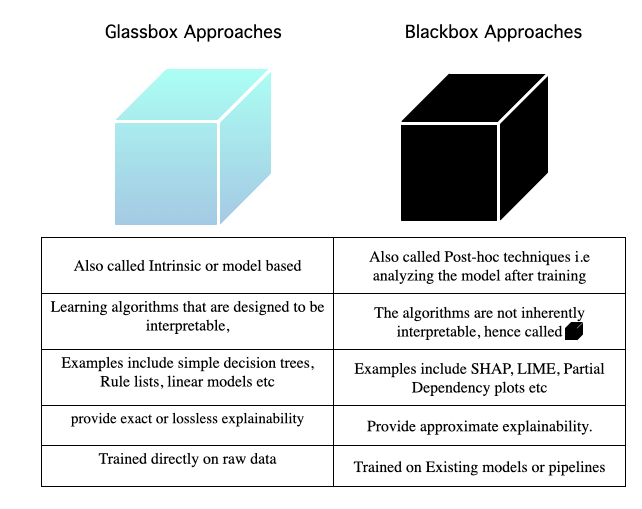

Global Explanations-Explaining the entire model Behavior

In [12]:
ebm_global = ebm.explain_global(name="EBM")
show(ebm_global)

<!-- http://127.0.0.1:7001/2626245093584/ -->

Local Explanaton : Explain individual predictions

In [13]:
ebm_local = ebm.explain_local(X_test[:10],y_test[:10],name="local EBM")
show(ebm_local)

<!-- http://127.0.0.1:7001/2626249784336/ -->

Evaluating EBM Performance on the hold out dataset

In [14]:
from interpret.perf import RegressionPerf
ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test,y_test)
show(ebm_perf)

<!-- http://127.0.0.1:7001/2626245508880/ -->

##Comparing EBM performance with other Regressors - Linear Regression, RegressionTree and Random Forest.



Interpret gives us the ability to compare the performance of multiple models in a single dashboard

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rt = RegressionTree(random_state=123)
rt.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [16]:
lr_perf = RegressionPerf(lr.predict).explain_perf(X_test, y_test, name='Linear Regression')
rt_perf = RegressionPerf(rt.predict).explain_perf(X_test, y_test, name='Regression Tree')
rf_perf = RegressionPerf(rf.predict).explain_perf(X_test, y_test, name='Blackbox')

In [17]:
lr_global = lr.explain_global(name='Linear Regression')
rt_global = rt.explain_global(name='Regression Tree')

In [18]:
#comapring the performances 
show(lr_perf)

<!-- http://127.0.0.1:7001/2626249051408/ -->

In [19]:
show(rt_perf)

<!-- http://127.0.0.1:7001/2626244912656/ -->

In [20]:
show(ebm_perf)

<!-- http://127.0.0.1:7001/2626245508880/ -->

In [21]:
show(rf_perf)

<!-- http://127.0.0.1:7001/2626239836496/ -->

In [22]:
#predicitons on test data on EBM
from sklearn.metrics import median_absolute_error
pred_data = ebm.predict(X_test)
Mae_score = median_absolute_error(y_test,pred_data)
print('Median Absolute Error : ', Mae_score)

Median Absolute Error :  0.6564038631235769


In [23]:
pred_data = lr.predict(X_test)
Mae_score = median_absolute_error(y_test,pred_data)
print('Median Absolute Error : ', Mae_score)

Median Absolute Error :  0.9793845698535248


In [24]:
pred_data = rf.predict(X_test)
Mae_score = median_absolute_error(y_test,pred_data)
print('Median Absolute Error : ', Mae_score)

Median Absolute Error :  0.6204999999999994


In [25]:
pred_data = rt.predict(X_test)
Mae_score = median_absolute_error(y_test,pred_data)
print('Median Absolute Error : ', Mae_score)

Median Absolute Error :  0.7878504672897266


In [26]:
#test data
test_data = pd.read_csv(r"C:\Users\ADAPA SUNIL KUMAR\Downloads\test.csv")

In [27]:
test_id=test_data['id']

In [28]:
predictions_test = rf.predict(test_data)

In [29]:
submission =pd.DataFrame({'id':test_id,
                          'Hardness':predictions_test})

In [30]:
submission.head()

,id,Hardness
0,10407,3.9830
1,10408,3.3970
2,10409,6.1310
3,10410,4.2180
4,10411,5.0315


In [31]:
submission.to_csv('submission_file.csv',index=False)

                 ###NOTE : This provides a basic idea of EBM. If you find it helpful or useful, please consider upvoting. Thank you ###